# Construindo um Grafo Automaticamente 

## Introdução

<p style="text-align: justify">Neste notebook nós vamos dar o primeiro passo para construir nossa rede neural artificial. Neste primeiro passo, nós vamos criar uma classe que gera automaticamente o nosso grafo computacional. O grafo computacional é o grafo que representa todas as operações matemáticas que ocorreram ao se computar um certo valor. O grafo computacional é um passo necessário pois será baseado nele que iremos computar os gradientes locais necessários para realizar o backpropagation.</p>

## Importações 

In [1]:
from funcoes import plota_grafo

In [2]:
try:
    import graphviz
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install graphviz

## Código e Discussões 

#### Primeiros passos
<p>A base de tudo será uma classe chamada <b>Valor</b>. Vamos começar pelo básico!</p>

In [3]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

<h4> Os dunders <b>__add__</b> e <b>__mul__</b> <h4>
Observe que não conseguimos adicionar nem multiplicar objetos criados com a classe <b>Valor</b>.

In [4]:
a = Valor(10)
b = Valor(5)

print(a + b)

TypeError: unsupported operand type(s) for +: 'Valor' and 'Valor'

In [5]:
print(a * b)

TypeError: unsupported operand type(s) for *: 'Valor' and 'Valor'

<p style="text-align: justify">Ué… porque não conseguimos? Não conseguimos pois o Python (ainda) não é vidente. Ele lá vai saber como adicionar ou multiplicar algo que você criou? Pra você parece óbvio que valores podem ser adicionados ou multiplicados, mas para o Python ele nem sabe o que significa a palavra <b>Valor</b>...</p>

<p style="text-align: justify">Como sempre, temos que contar para o programa o que queremos que aconteça quando usarmos os operadores + e *. Quem faz isso são os dunders __add__ e __mul__.</p>

In [6]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        saida = Valor(self.data + outro_valor.data)
        return saida

    def __mul__(self, outro_valor):
        saida = Valor(self.data * outro_valor.data)
        return saida

In [7]:
a = Valor(10)
b = Valor(5)

print(a + b)
print(a * b)

Valor(data=15)
Valor(data=50)


#### Registrando os progenitores
<p style="text-align: justify">Nosso objetivo é construir um grafo computacional. Em um grafo computacional, um certo vértice pode ter um ou mais vértices progenitores (são seus pais/mães). Nós não podemos perder essa informação quando formos construir um grafo, então precisamos incluir essa informação na nossa classe.</p>

In [8]:
class Valor:
    def __init__(self, data, progenitor=()):
        self.data = data
        self.progenitor = progenitor

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

In [9]:
a = Valor(10)
b = Valor(5)

print(a.data)
print(a.progenitor)

c = a + b
d = c * a

print(c)
print(a)
print(d.progenitor)

10
()
Valor(data=15)
Valor(data=10)
(Valor(data=15), Valor(data=10))


#### Registrando o operador mãe
Em um grafo computacional, um vértice pode ter um operador mãe. O operador mãe é o operador que foi usado para gerar o vértice.

In [10]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

In [11]:
a = Valor(10)
b = Valor(5)

c = a + b
d = c * a

print(c)
print(c.progenitor)
print(c.operador_mae)

Valor(data=15)
(Valor(data=10), Valor(data=5))
+


#### Plotando o primeiro grafo
Vamos plotar nosso primeiro grafo!

In [12]:
a = Valor(2)
b = Valor(-3)
c = Valor(10)

d = a * b
e = d + c

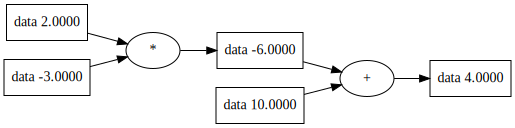

In [13]:
plota_grafo(e) # Rodar quando instalar programinha com erik

#### Registrando o rótulo
Nosso grafo seria mais legível se tivéssemos rótulos indicando o que é cada vértice. Vamos incluir essa informação na nossa classe.

In [14]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

In [15]:
a = Valor(2, rotulo="a")
b = Valor(-3, rotulo="b")
c = Valor(10, rotulo="c")

d = a * b
e = d + c

d.rotulo = "d"
e.rotulo = "e"

grafo = plota_grafo(e)
print(grafo)

digraph {
	graph [rankdir=LR]
	1884557117520 [label="{ c | data 10.0000 }" shape=record]
	1884557118048 [label="{ d | data -6.0000 }" shape=record]
	"1884557118048*" [label="*"]
	"1884557118048*" -> 1884557118048
	1884557115648 [label="{ a | data 2.0000 }" shape=record]
	1884557116704 [label="{ b | data -3.0000 }" shape=record]
	1884557118288 [label="{ e | data 4.0000 }" shape=record]
	"1884557118288+" [label="+"]
	"1884557118288+" -> 1884557118288
	1884557116704 -> "1884557118048*"
	1884557117520 -> "1884557118288+"
	1884557118048 -> "1884557118288+"
	1884557115648 -> "1884557118048*"
}



#### Refazendo o grafo que fizemos na aula anterior
Na aula anterior nós fizemos um grafo computacional para aprender como funciona o backpropagation. Vamos refazer ele aqui!

In [16]:
x1 = Valor(60, rotulo="x1")
x2 = Valor(24, rotulo="x2")
w1 = Valor(10, rotulo="w1")
w2 = Valor(5, rotulo="w2")
w3 = Valor(2, rotulo="w3")
b = Valor(7, rotulo="b")

s1 = x1 * w1
s1.rotulo = "s1"

s2 = x2 * w2
s2.rotulo = "s2"

n = s1 + s2
n.rotulo = "n"

k = n + b
k.rotulo = "k"

y = k * w3
y.rotulo = "y"

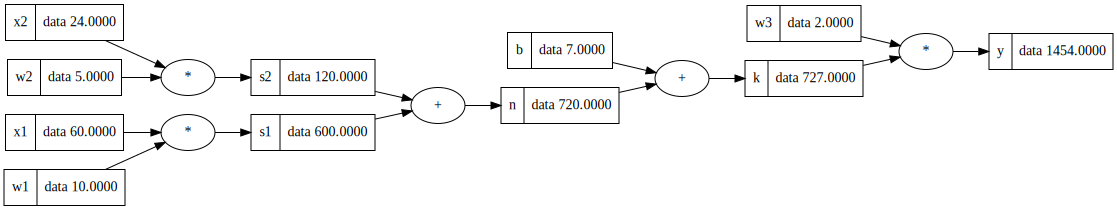

In [17]:
plota_grafo(y) # rodar quando instalar programinha com erik

## Conclusão

<p style="text-align: justify"> Dando inicio a construção da classe Valor, vemos os atributos que começam a relacionar este conteúdo ao funcionamento de uma rede neural. Nesta etapa, é essencial entender que o que esta sendo construido é o comportamento de uma rede em relação aos dados recebidos, a forma como ela vai opera-los, vemos um pouco também o que ela pode nos oferecer sobre essas operações, atributos como o rótulo, os operadores e os progenitores são importante para reconhecer os processos que estão ocorrendo dentro da sua classe. </p>

<p style="text-align: justify"> Vale comentar que os atributos a classa Valor agora possui, foram dados a ela a critério do autor, ou seja, uma classe deve ser habilitada de forma a realizar as tarefas que o desenvolverdor programa, desta forma, uma classe pode ser muito simple - feita para realizar operações matemáticas básicas - ou muito mais complexa, a depender da necessidade. </p>

## Playground

